## The 2nd Order Runge-Kutta Method of Non-Binary Orbital System

In [19]:
# import the packages
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# the constants

G = 4*(np.pi**2) # gravitational constant units: AU^3/yr^2
M = 1 # solar mass ... makes equations easier
R = 1 # AU for circular orbits

In [21]:
# initialising variables / initial conditions

# initial position = x0 and y0 (in AU)
# initial velocity = v_x and v_y (in AU/yr)

# initial position
x0 = 1
y0 = 0

# initial velocity
v_x = 0
v_y = np.pi

In [22]:
# Using Kepler's Third Law, the equation of a period of a circular orbit is

T = np.sqrt(((4*(np.pi**2))/G*M)*R**3)

# the time step - small iteration for the loop to show the approximate motion at that time for that x amount of time

dt = 0.0015
step = int(T/dt)    # how many years iteration

# to store the trajectories, use arrays
xvalues = [x0]
yvalues = [y0]

# initialise the variables so that it uses after the ones stored in the array
x = x0
y = y0

# to be used when the volecity is getting updated
vx = v_x
vy = v_y

energies = []
times = []

In [23]:
# for using the 2nd Runge Kutta method

# the derivatives
def derivatives(x, y, vx, vy):
    r = np.sqrt(x**2 + y**2) # distance from the Sun circular orbit and modulus
    dxdt = vx
    dydt = vy
    ax = -(G*M*x)/(r**3) # acceleration in the x direction
    ay = -(G*M*y)/(r**3) # acceleration in the y direction
    return dxdt, dydt, ax, ay

# the loop
for i in range(step):
    k1_x, k1_y, k1_vx, k1_vy = derivatives(x, y, vx, vy) # obtaining the slopes of the functions
    r = np.sqrt(x**2 + y**2) # distance from the Sun circular orbit and modulus

    # midpoint calculations
    x_mid = x + (0.5*dt*k1_x)
    y_mid = y + (0.5*dt*k1_y)
    vx_mid = vx + (0.5*dt*k1_vx)
    vy_mid = vy + (0.5*dt*k1_vy)

    # slope at midpoint (RK2)
    k2_x, k2_y, k2_vx, k2_vy = derivatives(x_mid, y_mid, vx_mid, vy_mid) # obtaining the slopes of the midpoints

    # updating the solution
    x = x + (dt*k2_x)
    y = y + (dt*k2_y)
    vx = vx + (dt*k2_vx)
    vy = vy + (dt*k2_vy)

    # snapshot interval
    snap = 20
    if i % snap == 0:
        xvalues.append(x)
        yvalues.append(y)
        
    # computing the total energy of the orbit
    # KE + PE = total energy of the body in orbit

    KE = 0.5*(1)*(vx**2 + vy**2)
    PE = -G*M/r

    E = KE + PE
    energies.append(E)
    times.append(i*dt)


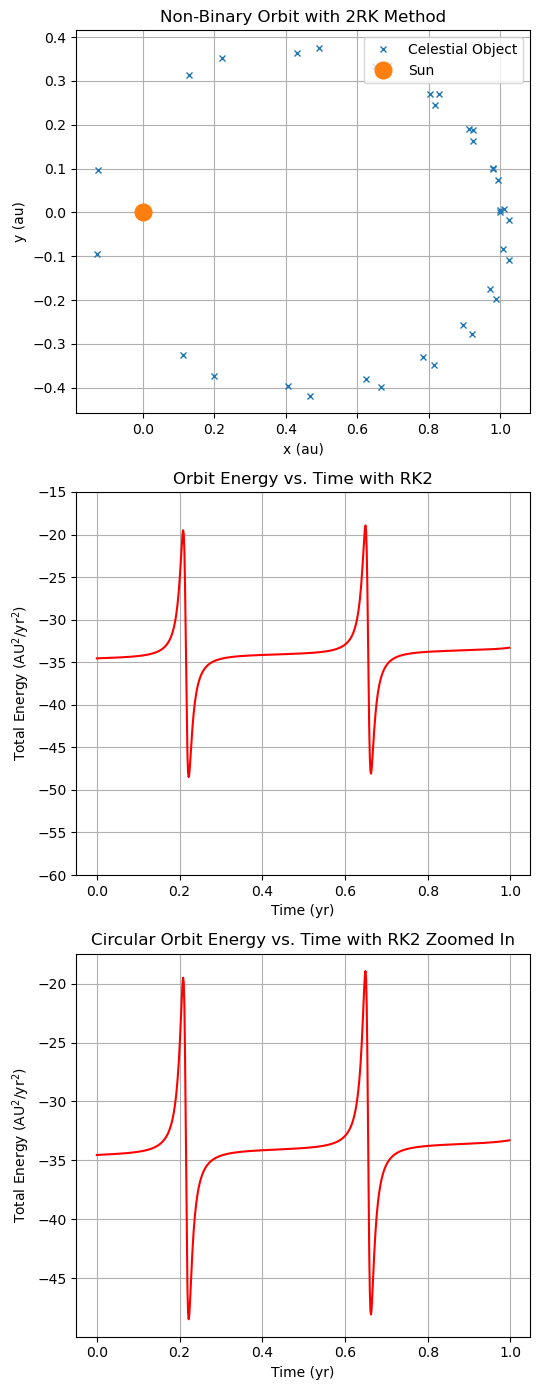

In [26]:
plt.figure(figsize=(5.5,14))

# plotting the graph
plt.subplot(3,1,1)
plt.plot(xvalues, yvalues, 'x', markersize = 5, label = "Celestial Object")
plt.plot(0, 0, "o", markersize = 12, label = "Sun")   # the Sun marker
plt.title('Non-Binary Orbit with 2RK Method')
plt.xlabel("x (au)")
plt.ylabel("y (au)")
plt.legend(loc='upper right')
plt.grid()

# energy time graph
plt.subplot(3,1,2)
plt.plot(times, energies, color='red')
plt.ylim(-60,-15)
plt.title('Orbit Energy vs. Time with RK2')
plt.xlabel("Time (yr)")
plt.ylabel("Total Energy (AU$^2$/yr$^2$)")
plt.grid()

# energy time plot zoomed in
plt.subplot(3,1,3)
plt.plot(times, energies, color='red')
plt.title('Circular Orbit Energy vs. Time with RK2 Zoomed In')
plt.xlabel("Time (yr)")
plt.ylabel("Total Energy (AU$^2$/yr$^2$)")
plt.grid()

plt.tight_layout()

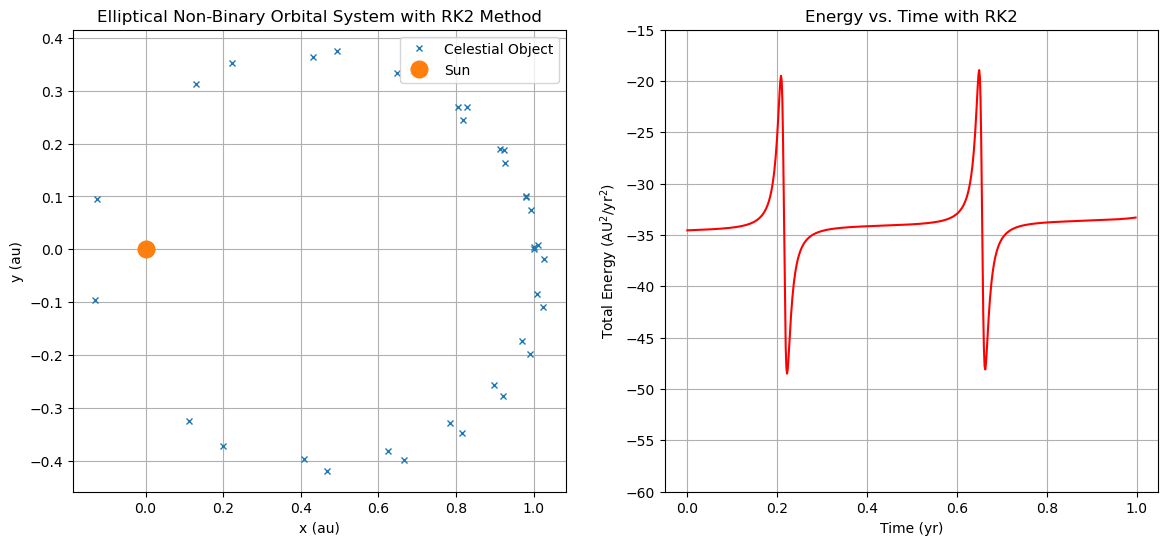

In [28]:
plt.figure(figsize=(14,6))

# plotting the graph
plt.subplot(1,2,1)
plt.plot(xvalues, yvalues, 'x', markersize = 5, label = "Celestial Object")
plt.plot(0, 0, "o", markersize = 12, label = "Sun")   # the Sun marker
plt.title('Elliptical Non-Binary Orbital System with RK2 Method')
plt.xlabel("x (au)")
plt.ylabel("y (au)")
plt.legend(loc='upper right')
plt.grid()

# energy time graph
plt.subplot(1,2,2)
plt.plot(times, energies, color='red')
plt.ylim(-60,-15)
plt.title('Energy vs. Time with RK2')
plt.xlabel("Time (yr)")
plt.ylabel("Total Energy (AU$^2$/yr$^2$)")
plt.grid()